In [123]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# Determine timestep --> needed for Euler

# Euler

# Calculate accelerations --> needed for timestep

# Calculate jerk --> needed for timestep

# Calculate Energy, |e|, |j|, a (conserved quantities)

# Write to file

In [125]:
# Some parameters
G = 1.0
N = 2
time = 0
period = 2*np.pi
endtime = 10*period
fixed_timestep = period*1e-3

In [126]:
# Array of masses of our N bodies
m = np.zeros(N)
m[0] = 1.0
m[1] = 1e-3

In [127]:
sma = 1.0
ecc = 0.0

In [128]:
def initial_values(sma, ecc, m):
    # sma = semi-major axis
    # See pg. 13
    
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[1] = sma*(1+ecc)
    vy[1] = np.sqrt(G*np.sum(m)/sma*(1 - ecc)/(1 + ecc)) # vis-viva equation
    return x, y, vx, vy

In [129]:
# Init values
x, y, vx, vy = initial_values(sma, ecc, m)

In [130]:
# Work in CoM system
xcm = 0.0
ycm = 0.0
vxcm = 0.0
vycm = 0.0
total_mass = np.sum(m)

for i in range(len(x)):
    xcm += m[i]*x[i]
    ycm += m[i]*y[i]
    vxcm += m[i]*vx[i]
    vycm += m[i]*vy[i]
    
xcm /= total_mass
ycm /= total_mass
vxcm /= total_mass
vycm /= total_mass

x -= xcm
y -= ycm
vx -= vxcm
vy -= vycm

In [131]:
def calc_acceleration(x, y):
        ax = np.zeros(N)
        ay = np.zeros(N)
        
        for i in range(len(x)):
            for j in range(len(x)):
                if i == j:
                    continue
                r = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                ax[i] += G*m[j] * (x[j] - x[i])/r**3
                ay[i] += G*m[j] * (y[j] - y[i])/r**3
        return ax, ay

In [132]:
def calc_timestep(x, y, vx, vy, m):
    return fixed_timestep

In [133]:
def calc_energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5 * m[i]*(vx[i]*vx[i] + vy[i]*vy[i])
        for j in range(i+1, len(x)):
            r = np.sqrt((x[j]-x[i])**2 + (y[j]-y[i])**2)
            E -= G * m[i]*m[j] / r
    return E

In [134]:
# Integrator
def euler(x, y, vx, vy, dt):
    ax, ay = calc_acceleration(x, y)
    x += vx*dt
    y += vy*dt
    vx += ax*dt
    vy += ay*dt
    return x, y, vx, vy

In [135]:
# symplectic euler integrator
def sympl_euler(dt):
    global x, y, vx, vy
    ax, ay = calc_acceleration(x, y)
    vx += ax*dt
    vy += ay*dt
    x += vx*dt
    y += vy*dt

In [136]:
# Main loop

xplot = []
yplot = []
timeplot = []
Eplot = []

while time < endtime:
    dt = calc_timestep(x, y, vx, vy, m)
    E = calc_energy(x, y, vx, vy, m)
    print("Time is %e\t\t\t" % time, end='\r')
    
    Eplot.append(E)
    xplot.append(x)
    yplot.append(y)
    timeplot.append(time)
    
    #sympl_euler(dt)
    x, y, vx, vy = euler(x, y, vx, vy, dt) # Call integrator step
    
    time += dt

Time is 1.433823e+01			

<IPython.core.display.Javascript object>


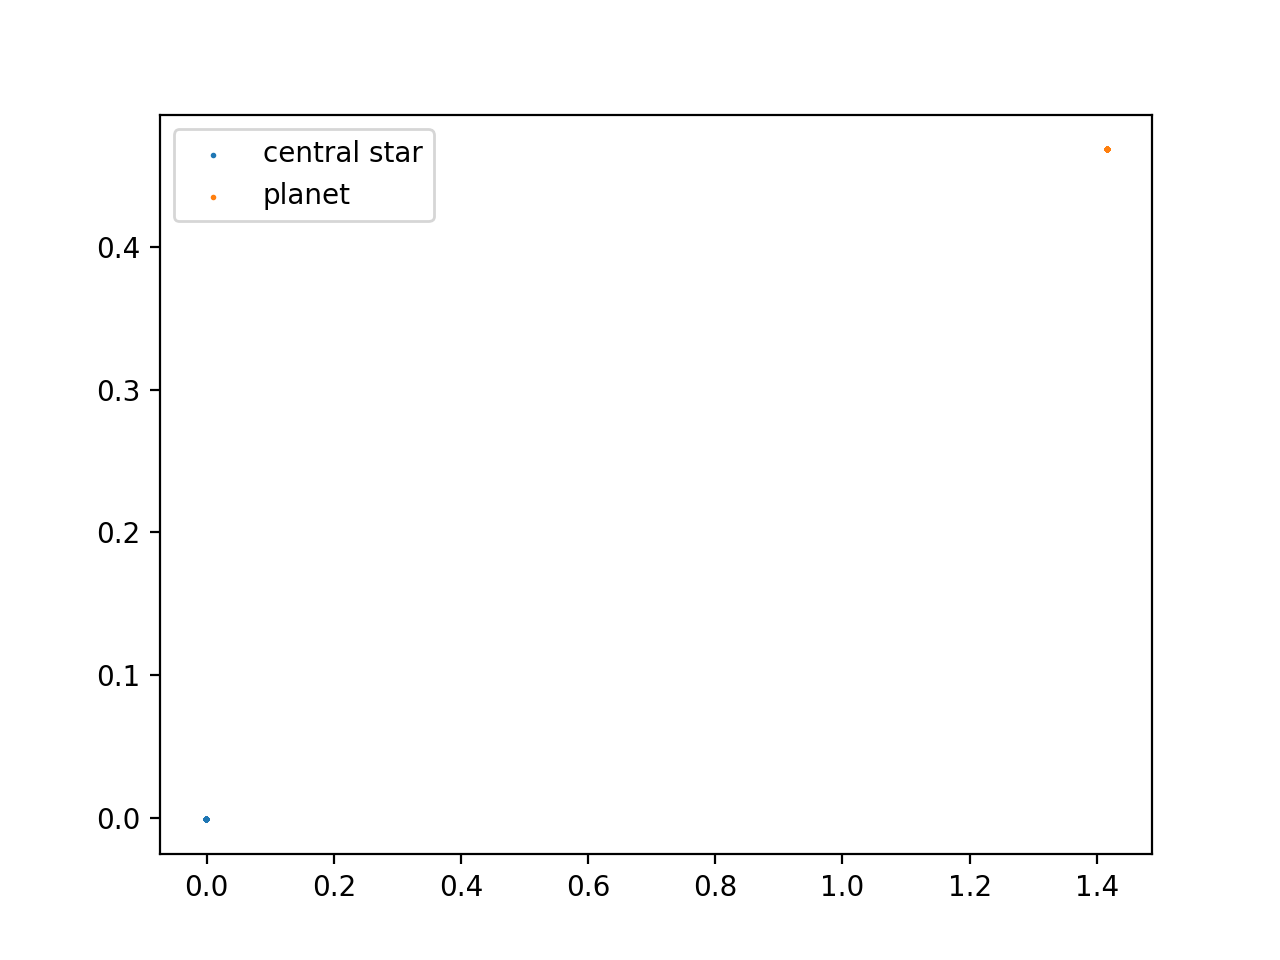

In [137]:
fig, ax = plt.subplots()
xplot = np.array(xplot)
yplot = np.array(yplot)

ax.scatter(xplot[:,0], yplot[:,0], s=1, label='central star')
ax.scatter(xplot[:,1], yplot[:,1], s=1, label='planet')

#ax.set_aspect('equal')
plt.legend()

<IPython.core.display.Javascript object>


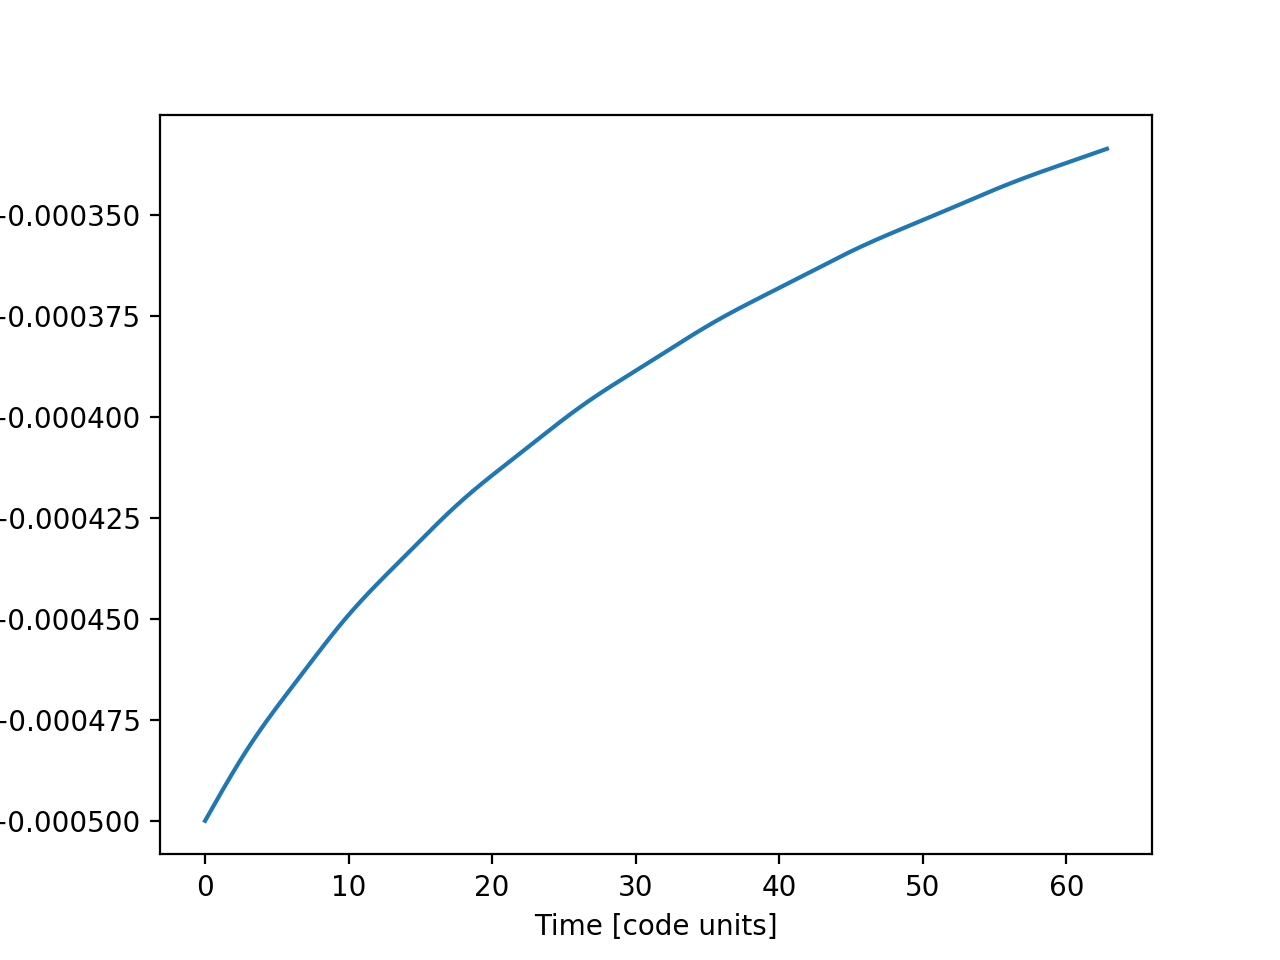

Text(0, 0.5, 'Energy [code units]')

In [138]:
fig, ax = plt.subplots()
Eplot = np.array(Eplot)
timeplot = np.array(timeplot)

ax.plot(timeplot, Eplot, label='Energy')
ax.set_xlabel('Time [code units]')
ax.set_ylabel('Energy [code units]')

<IPython.core.display.Javascript object>


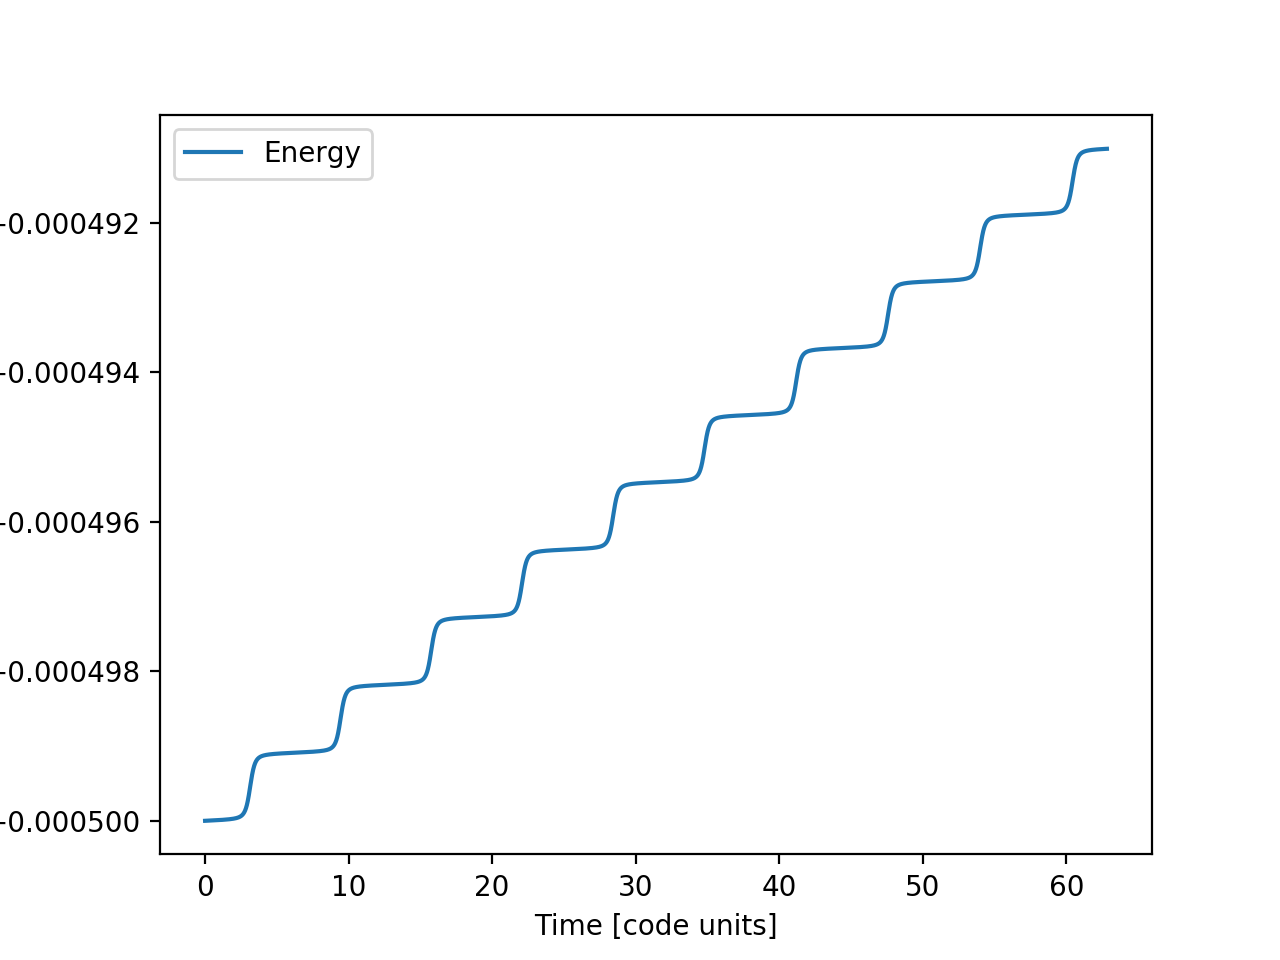

In [146]:
# this python script originates from
# the live coding session on 12 August 2020
# within the labwork
# author Christoph Schaefer

G = 1.0
N = 2
time = 0
period = 2*np.pi
endtime = 10*period
#fixed_timestep = period*1e-3 # Fine for verlet, symp_euler
fixed_timestep = period*1e-5

m = np.zeros(N)
m[0] = 1.0
m[1] = 1e-3
sma = 1.0
ecc = 0.5


# returns timestep
# needs to be improved
def calc_timestep(x, y, vx, vy, m):
    # Logic
    # --> adaptive timestep
    return fixed_timestep


# calculate the energy of the system
def calc_energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5 * m[i]*(vx[i]*vx[i] + vy[i]*vy[i])
        for j in range(i+1, len(x)):
            r = np.sqrt((x[j]-x[i])**2 + (y[j]-y[i])**2)
            E -= G * m[i]*m[j] / r
    return E

# calculates accelerations due to gravity
def calc_accels(x, y):
    ax = np.zeros(N)
    ay = np.zeros(N)
    for i in range(len(y)):
        for j in range(len(y)):
            if i == j:
                continue
            r = np.sqrt((x[j]-x[i])**2 + (y[j]-y[i])**2)
            ax[i] += G*m[j] * (x[j]-x[i])/r**3
            ay[i] += G*m[j] * (y[j]-y[i])/r**3
    return ax, ay

# sets coordinates and velocities according to semi-major axis and eccentricity
def initial_values(sma, ecc, m):
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[1] = sma*(1+ecc) # p13 apocenter
    vy[1] = np.sqrt(G*np.sum(m)/sma * (1-ecc)/(1+ecc)) # vis-viva equation
    return x, y, vx, vy



# verlet integrator (kick-drift-kick)
def verlet(dt):
    global ax, ay
    global x, y, vx, vy
    vxtmp = vx + 0.5*dt*ax
    vytmp = vy + 0.5*dt*ay
    x += dt*vxtmp
    y += dt*vytmp
    ax, ay = calc_accels(x, y)
    vx[:] = vxtmp[:] + 0.5*dt*ax[:]
    vy[:] = vytmp[:] + 0.5*dt*ay[:]



# simple euler integrator
def euler(dt):
    global x, y, vx, vy
    ax, ay = calc_accels(x, y)
    x += vx*dt
    y += vy*dt
    vx += ax*dt
    vy += ay*dt


# symplectic euler integrator
def sympl_euler(dt):
    global x, y, vx, vy
    ax, ay = calc_accels(x, y)
    vx += ax*dt
    vy += ay*dt
    x += vx*dt
    y += vy*dt


x, y, vx, vy = initial_values(sma, ecc, m)

xcm = 0.0
ycm = 0.0
vxcm = 0.0
vycm = 0.0
total_mass = np.sum(m)

for i in range(len(x)):
    xcm += m[i]*x[i]
    ycm += m[i]*y[i]
    vxcm += m[i]*vx[i]
    vycm += m[i]*vy[i]

xcm /= total_mass
ycm /= total_mass
vxcm /= total_mass
vycm /= total_mass

x -= xcm
y -= ycm
vx -= vxcm
vy -= vycm

xplot = []
yplot = []
timeplot = []
Eplot = []

ax, ay = calc_accels(x, y)

while time < endtime:
    dt = calc_timestep(x, y, vx, vy, m)
    E = calc_energy(x, y, vx, vy, m)
    Eplot.append(E)
    #print("Timestep is %e, time is %e\t\t\t" % (dt, time), end='\r')
    xplot.append(list(x))
    yplot.append(list(y))
    timeplot.append(time)
    euler(dt)
    #sympl_euler(dt)
    #verlet(dt)
    time += dt

fig, ax = plt.subplots()
xplot = np.array(xplot)
yplot = np.array(yplot)
Eplot = np.array(Eplot)
timeplot = np.array(timeplot)

#ax.scatter(xplot[:,0], yplot[:,0], s=1, label='central star')
#ax.scatter(xplot[:,1], yplot[:,1], s=1, label='planet')
ax.plot(timeplot, Eplot, label='Energy')
ax.set_xlabel('Time [code units]')
ax.set_ylabel('Energy [code units]')

#ax.set_aspect('equal')
plt.legend()


<IPython.core.display.Javascript object>


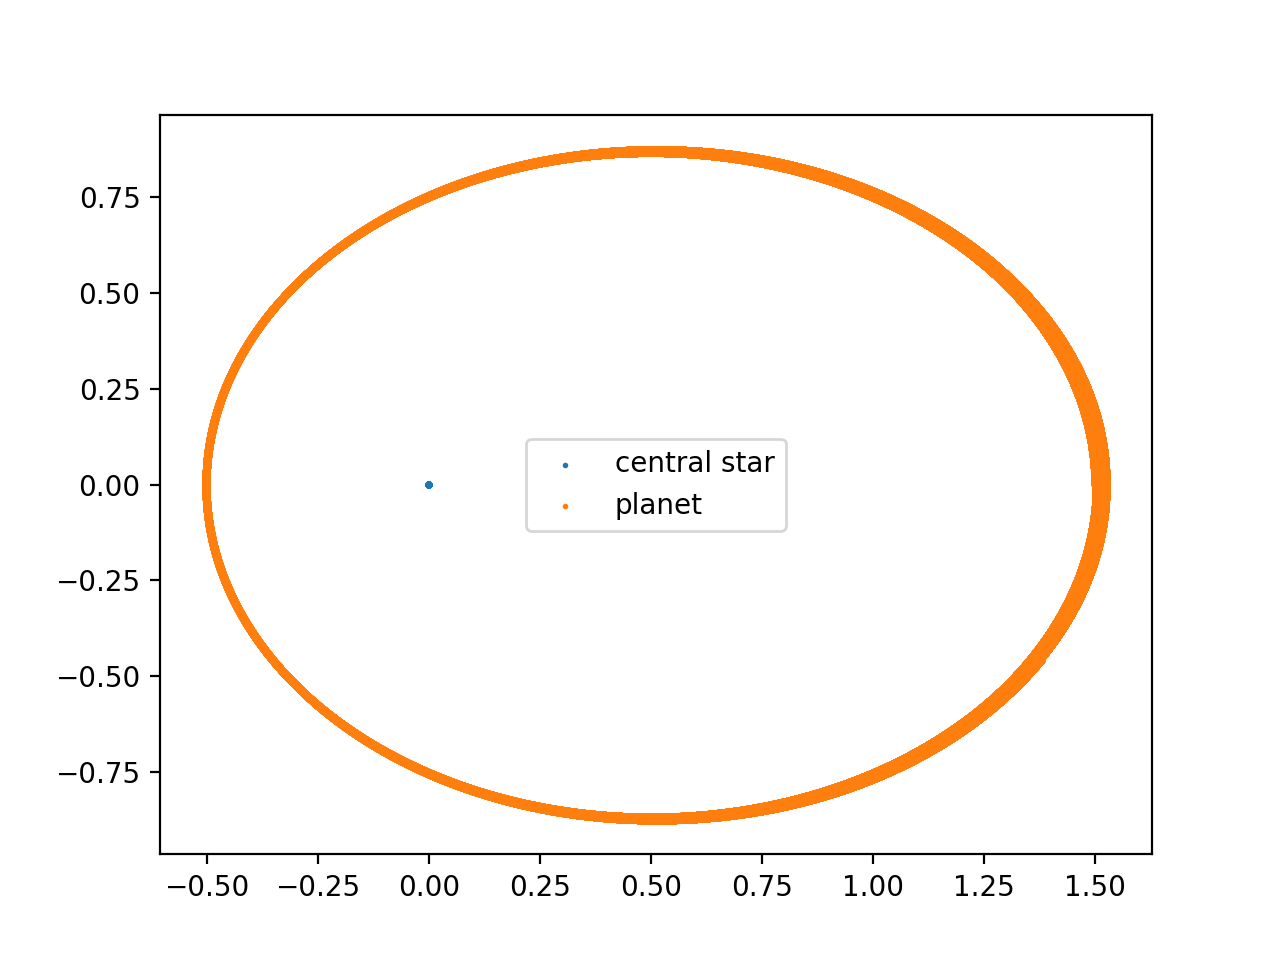

In [147]:
fig, ax = plt.subplots()
ax.scatter(xplot[:,0], yplot[:,0], s=1, label='central star')
ax.scatter(xplot[:,1], yplot[:,1], s=1, label='planet')
plt.legend()

In [149]:
xplot[:,1]

array([1.4985015 , 1.4985015 , 1.4985015 , ..., 1.38152842, 1.38155108,
       1.38157375])

<IPython.core.display.Javascript object>


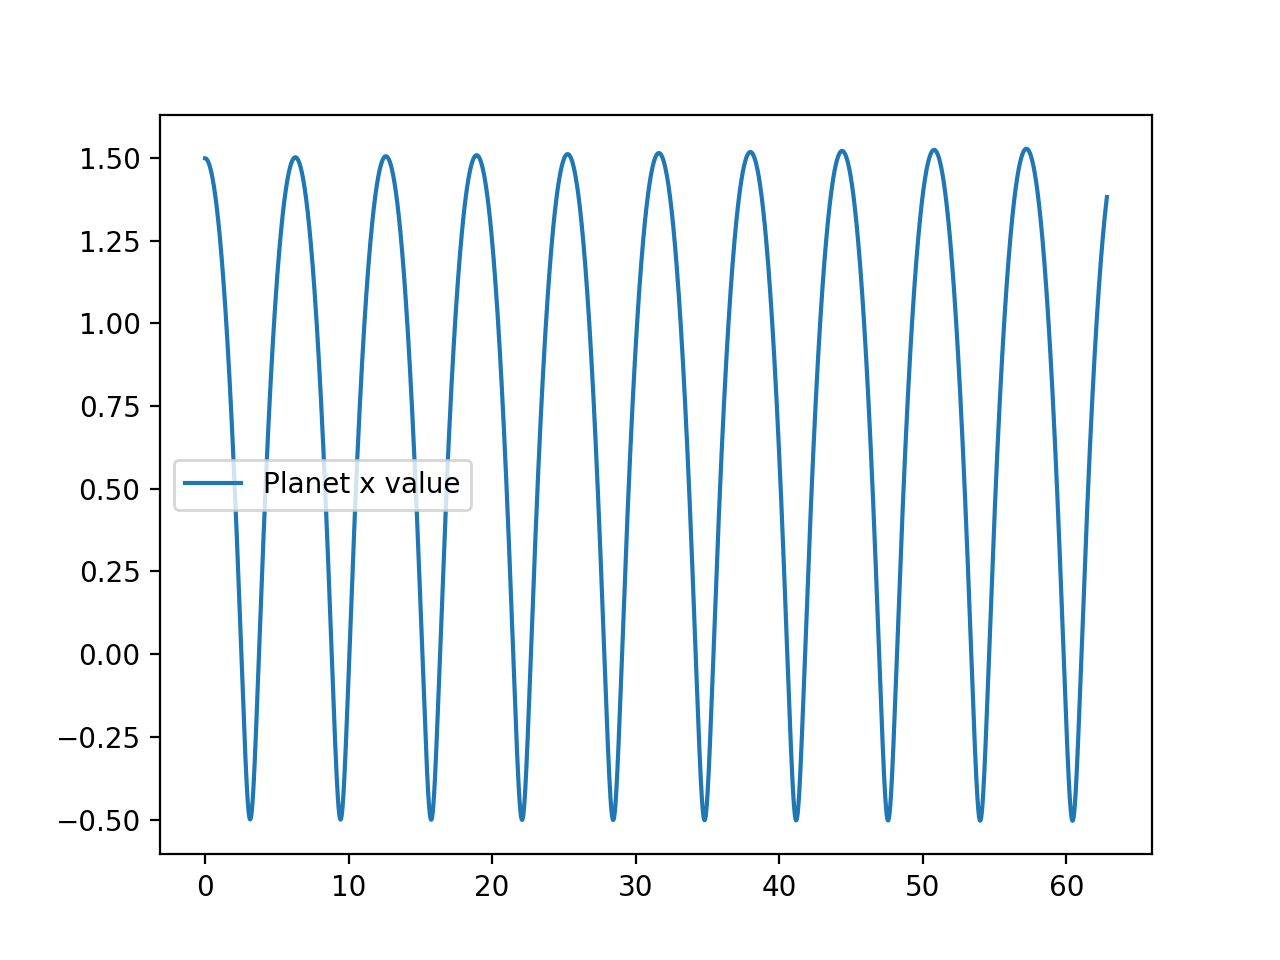

In [153]:
fig = plt.figure()
plt.plot(timeplot, xplot[:,1], label="Planet x value") # 

plt.legend()